In [1]:
   # Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

import pprint
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


In [2]:
df=pd.read_csv("/content/crop price (1).csv")

In [3]:
df

,timestamp,state,district,market,commodity,variety,arrival_date,Season,Petrol Price,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),01-01-2022,Heavy Rainfall,Increased by 2,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,02-01-2022,Moderate rainfall,No Change,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,03-01-2022,Cloudy,No Change,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,04-01-2022,Sunny,No Change,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,05-01-2022,Low Rainfall,No Change,3550.0,3650.0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7413,1523025127,West Bengal,Uttar Dinajpur,Islampur,Jute,TD-5,27-12-2022,Heavy Rainfall,No Change,3700.0,3900.0,3800.0
7414,1523025127,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,28-12-2022,Heavy Rainfall,No Change,830.0,870.0,850.0
7415,1523025127,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,29-12-2022,Heavy Rainfall,No Change,3250.0,3350.0,3300.0
7416,1523025127,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,30-12-2022,Heavy Rainfall,No Change,3600.0,3800.0,3700.0


In [4]:
df.shape

(7418, 12)

In [5]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,Season,Petrol Price,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),01-01-2022,Heavy Rainfall,Increased by 2,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,02-01-2022,Moderate rainfall,No Change,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,03-01-2022,Cloudy,No Change,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,04-01-2022,Sunny,No Change,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,05-01-2022,Low Rainfall,No Change,3550.0,3650.0,3600.0


In [6]:
df.tail()

,timestamp,state,district,market,commodity,variety,arrival_date,Season,Petrol Price,min_price,max_price,modal_price
7413,1523025127,West Bengal,Uttar Dinajpur,Islampur,Jute,TD-5,27-12-2022,Heavy Rainfall,No Change,3700.0,3900.0,3800.0
7414,1523025127,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,28-12-2022,Heavy Rainfall,No Change,830.0,870.0,850.0
7415,1523025127,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,29-12-2022,Heavy Rainfall,No Change,3250.0,3350.0,3300.0
7416,1523025127,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,30-12-2022,Heavy Rainfall,No Change,3600.0,3800.0,3700.0
7417,1523025127,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,31-12-2022,Heavy Rainfall,Decreased by 4,3150.0,3250.0,3200.0


In [7]:
df.describe()

,timestamp,min_price,max_price,modal_price
count,7.418000e+03,7418.000000,7418.000000,7418.000000
mean,1.523025e+09,2551.547816,2999.163084,2804.140783
std,4.987461e-01,3563.042575,4199.273121,3917.043677
min,1.523025e+09,0.000000,0.000000,0.410000
25%,1.523025e+09,900.000000,1100.000000,1000.000000
50%,1.523025e+09,1650.000000,2000.000000,1828.500000
75%,1.523025e+09,3200.000000,3650.000000,3500.000000
max,1.523025e+09,95000.000000,110000.000000,100000.000000


In [8]:
df.columns

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'Season', 'Petrol Price', 'min_price', 'max_price',
       'modal_price'],
      dtype='object')

<Axes: >

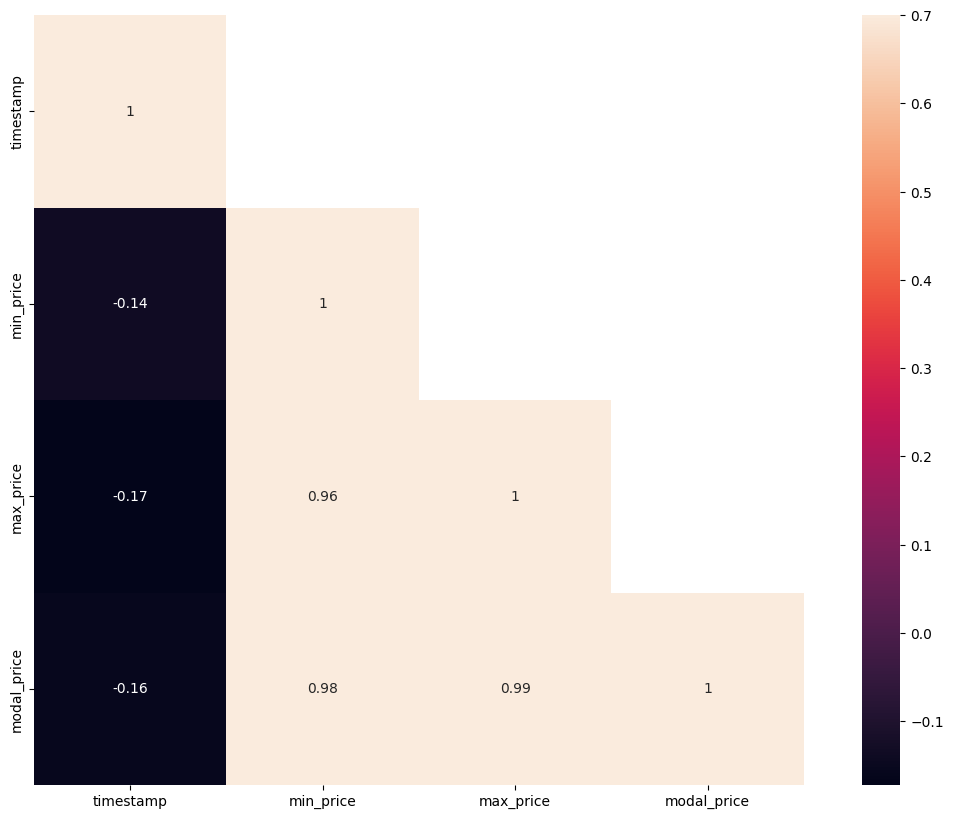

In [10]:
correlation_map = df.select_dtypes(include=['number']).corr() # Select only numeric columns for correlation calculation
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [11]:
df.state.unique()

array(['Assam', 'Chattisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'NCT of Delhi', 'Orissa',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [12]:
df.state.nunique()

22

In [13]:
df.district.unique()

array(['Barpeta', 'Dhemaji', 'Kamrup', 'Nagaon', 'Nalbari', 'Sonitpur',
       'Bastar', 'Bilaspur', 'Durg', 'Janjgir', 'Mahasamund',
       'North Bastar', 'Rajnandgaon', 'Surguja', 'Ahmedabad', 'Amreli',
       'Anand', 'Banaskanth', 'Bharuch', 'Bhavnagar', 'Dahod',
       'Gandhinagar', 'Jamnagar', 'Junagarh', 'Kheda', 'Mehsana', 'Morbi',
       'Panchmahals', 'Patan', 'Porbandar', 'Rajkot', 'Sabarkantha',
       'Surat', 'Surendranagar', 'Vadodara(Baroda)', 'Valsad', 'Ambala',
       'Bhiwani', 'Faridabad', 'Fatehabad', 'Jind', 'Kaithal', 'Karnal',
       'Kurukshetra', 'Mahendragarh-Narnaul', 'Panchkula', 'Rohtak',
       'Sirsa', 'Sonipat', 'Yamuna Nagar', 'Chamba', 'Hamirpur', 'Kangra',
       'Kullu', 'Mandi', 'Shimla', 'Sirmore', 'Solan', 'Una', 'Bokaro',
       'Dhanbad', 'East Singhbhum', 'Garhwa', 'Giridih', 'Godda', 'Gumla',
       'Koderma', 'Lohardaga', 'Pakur', 'Ranchi', 'Simdega', 'Bagalkot',
       'Bangalore', 'Belgaum', 'Bellary', 'Bidar', 'Bijapur',
       'Chamraj

In [14]:
df.district.nunique()

348

In [15]:
df.commodity.unique()

array(['Black Gram (Urd Beans)', 'Corriander seed', 'Jute',
       'Lentil(Masur)', 'Mustard', 'Potato', 'Wheat Atta', 'Maida Atta',
       'Green Chilli', 'Green Gram Dal (Moong Dal)', 'Paddy(Dhan)',
       'Bengal Gram(Gram)', 'Lak(Teora)', 'Onion', 'Tomato', 'Tinda',
       'Mahua', 'Bhindi(Ladies Finger)', 'Lemon', 'Maize', 'Bottle gourd',
       'Brinjal', 'Carrot', 'Methi(Leaves)', 'Cotton',
       'Bajra(Pearl Millet/Cumbu)', 'Castor Seed', 'Chili Red',
       'Cummin Seed(Jeera)', 'Jowar(Sorghum)', 'Methi Seeds',
       'Sesamum(Sesame,Gingelly,Til)', 'Wheat', 'Suva (Dill Seed)',
       'Rajgir', 'Soanf', 'Guar Seed(Cluster Beans Seed)',
       'Coriander(Leaves)', 'Ginger(Green)', 'Groundnut',
       'Arhar (Tur/Red Gram)', 'Beans', 'Soyabean', 'Barley (Jau)',
       'Green Gram (Moong)', 'Groundnut (Split)', 'Isabgul (Psyllium)',
       'Kulthi(Horse Gram)', 'Ground Nut Seed', 'Garlic', 'Cluster beans',
       'Cauliflower', 'Cucumbar(Kheera)', 'Pumpkin', 'Apple',
       'Bit

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     7418 non-null   int64  
 1   state         7418 non-null   object 
 2   district      7418 non-null   object 
 3   market        7418 non-null   object 
 4   commodity     7418 non-null   object 
 5   variety       7418 non-null   object 
 6   arrival_date  7418 non-null   object 
 7   Season        7418 non-null   object 
 8   Petrol Price  7418 non-null   object 
 9   min_price     7418 non-null   float64
 10  max_price     7418 non-null   float64
 11  modal_price   7418 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 695.6+ KB


In [17]:
def get_val(state , district , commodity):
    temp = df.loc[(df.state == state) & (df.district == district) & (df.commodity == commodity), : ]
    fig, axes = plt.subplots(6,1)
    fig.set_size_inches(20, 30)
    sns.barplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[0] )
    sns.pointplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[1] )
    #sns.stripplot(x="market", y="min_price", data=temp , jitter=True ,  ax = axes[1])
    #sns.distplot(temp.modal_price , ax = axes[3])
    sns.barplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[2] )
    sns.pointplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[3] )
    sns.barplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[4] )
    sns.pointplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[5] )

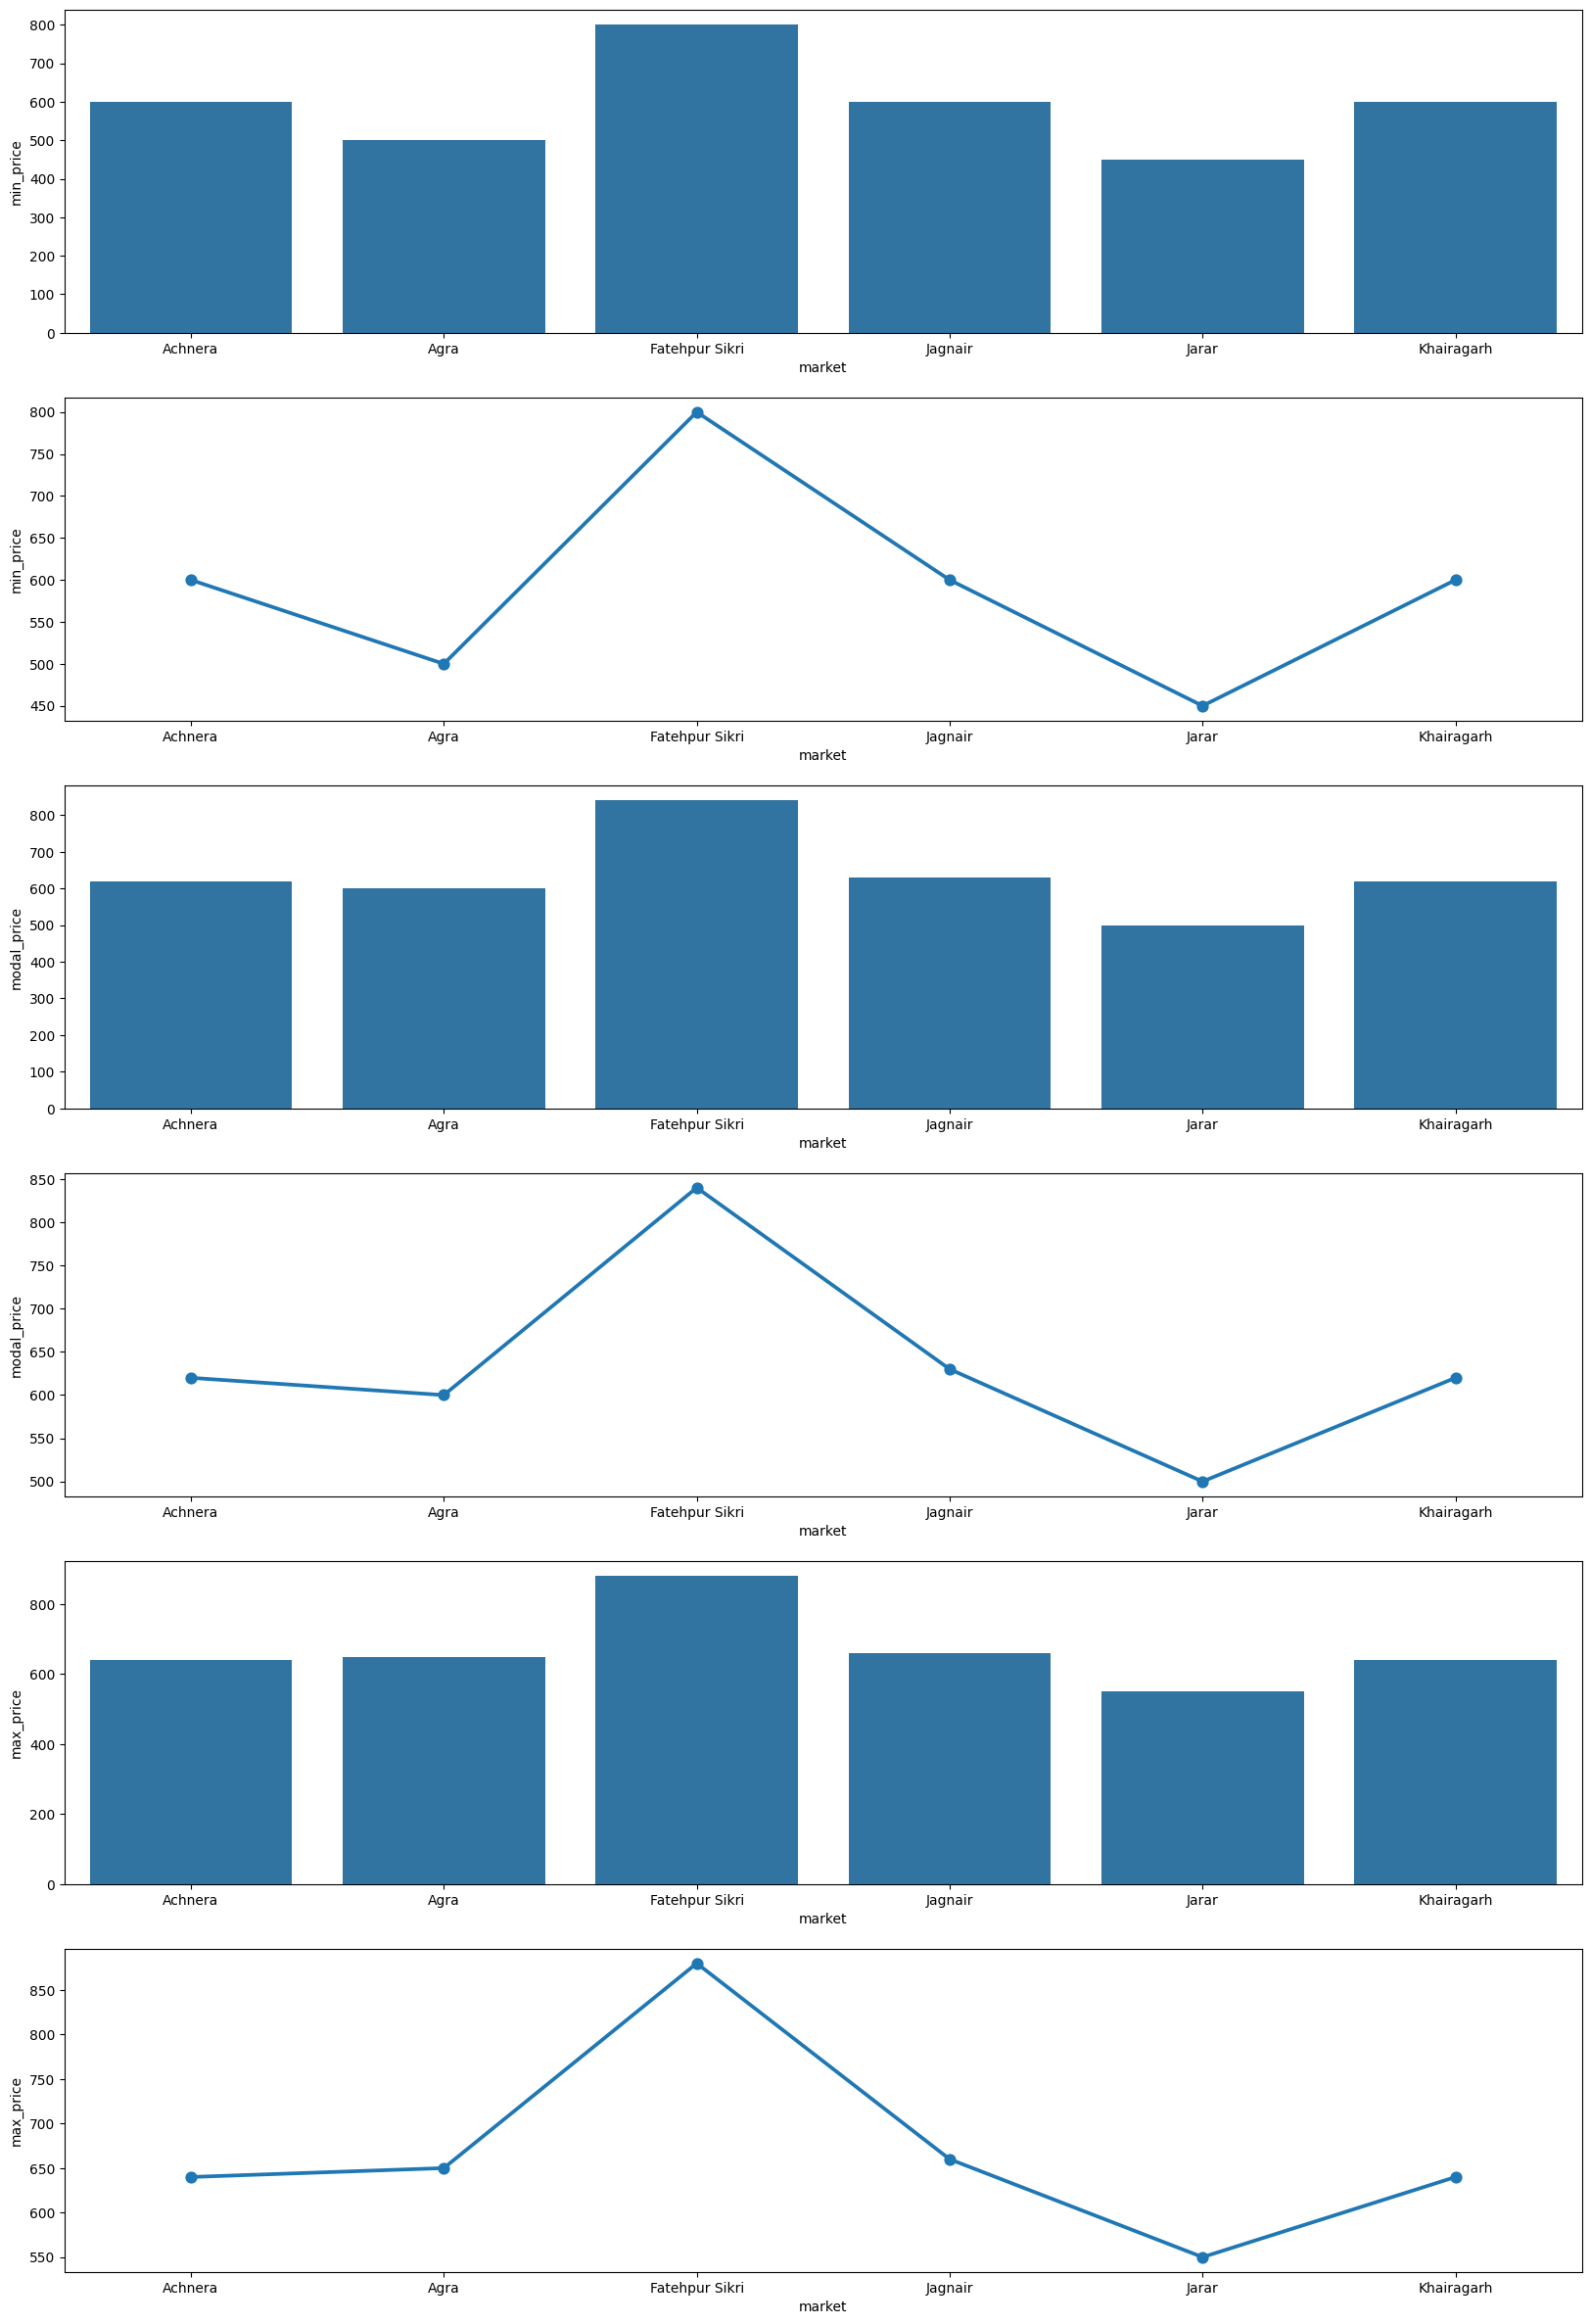

In [18]:
get_val("Uttar Pradesh" , "Agra" , "Brinjal")

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['commodity'] = le.fit_transform(df['commodity'])
df['variety'] = le.fit_transform(df['variety'])

In [20]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,Season,Petrol Price,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,21,52,01-01-2022,Heavy Rainfall,Increased by 2,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,50,86,02-01-2022,Moderate rainfall,No Change,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,93,312,03-01-2022,Cloudy,No Change,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,102,207,04-01-2022,Sunny,No Change,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,125,221,05-01-2022,Low Rainfall,No Change,3550.0,3650.0,3600.0


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['state'] = le.fit_transform(df['state'])
df['district'] = le.fit_transform(df['district'])
df['market'] = le.fit_transform(df['market'])
df["Season"]=le.fit_transform(df["Season"])
df["Petrol Price"]=le.fit_transform(df["Petrol Price"])

In [22]:
df['min_price'] = df['min_price'].fillna(0).astype(int)
df['max_price'] = df['max_price'].fillna(0).astype(int)
df['modal_price'] = df['modal_price'].fillna(0).astype(int)

In [23]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,Season,Petrol Price,min_price,max_price,modal_price
0,1523025126,0,36,161,21,52,01-01-2022,2,6,2800,3000,2900
1,1523025126,0,36,161,50,86,02-01-2022,4,7,3500,4000,3825
2,1523025126,0,36,161,93,312,03-01-2022,1,7,3200,3875,3825
3,1523025126,0,36,161,102,207,04-01-2022,5,7,3400,3600,3500
4,1523025126,0,36,161,125,221,05-01-2022,3,7,3550,3650,3600


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     7418 non-null   int64 
 1   state         7418 non-null   int64 
 2   district      7418 non-null   int64 
 3   market        7418 non-null   int64 
 4   commodity     7418 non-null   int64 
 5   variety       7418 non-null   int64 
 6   arrival_date  7418 non-null   object
 7   Season        7418 non-null   int64 
 8   Petrol Price  7418 non-null   int64 
 9   min_price     7418 non-null   int64 
 10  max_price     7418 non-null   int64 
 11  modal_price   7418 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 695.6+ KB


In [25]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0


In [26]:
df.isnull().sum()

,0
timestamp,0
state,0
district,0
market,0
commodity,0
variety,0
arrival_date,0
Season,0
Petrol Price,0
min_price,0


In [27]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,Season,Petrol Price,min_price,max_price,modal_price
0,1523025126,0,36,161,21,52,01-01-2022,2,6,2800,3000,2900
1,1523025126,0,36,161,50,86,02-01-2022,4,7,3500,4000,3825
2,1523025126,0,36,161,93,312,03-01-2022,1,7,3200,3875,3825
3,1523025126,0,36,161,102,207,04-01-2022,5,7,3400,3600,3500
4,1523025126,0,36,161,125,221,05-01-2022,3,7,3550,3650,3600


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     7418 non-null   int64 
 1   state         7418 non-null   int64 
 2   district      7418 non-null   int64 
 3   market        7418 non-null   int64 
 4   commodity     7418 non-null   int64 
 5   variety       7418 non-null   int64 
 6   arrival_date  7418 non-null   object
 7   Season        7418 non-null   int64 
 8   Petrol Price  7418 non-null   int64 
 9   min_price     7418 non-null   int64 
 10  max_price     7418 non-null   int64 
 11  modal_price   7418 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 695.6+ KB


In [29]:
df.to_csv('preprocessed_csv.csv')

# Train-Test split

In [30]:
x=df.iloc[:,[1,2,3,4,5,7,8]]
y=df['modal_price']

In [31]:
x

,state,district,market,commodity,variety,Season,Petrol Price
0,0,36,161,21,52,2,6
1,0,36,161,50,86,4,7
2,0,36,161,93,312,1,7
3,0,36,161,102,207,5,7
4,0,36,161,125,221,3,7
...,...,...,...,...,...,...,...
7413,21,332,385,93,312,2,7
7414,21,332,385,146,165,2,7
7415,21,332,385,152,237,2,7
7416,21,332,761,93,312,2,7


In [32]:
y

,modal_price
0,2900
1,3825
2,3825
3,3500
4,3600
...,...
7413,3800
7414,850
7415,3300
7416,3700


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [35]:
X_train

,state,district,market,commodity,variety,Season,Petrol Price
2885,9,233,444,137,237,0,7
4731,19,1,7,19,44,2,7
457,3,103,290,33,68,4,7
7199,21,60,437,146,165,4,7
318,2,269,762,111,270,5,7
...,...,...,...,...,...,...,...
905,5,55,162,16,55,4,7
5192,19,26,88,146,102,4,7
3980,14,240,81,27,237,5,7
235,2,220,424,125,221,5,7


In [36]:
y_train

,modal_price
2885,1800
4731,3250
457,650
7199,840
318,1375
...,...
905,5240
5192,785
3980,550
235,3350


# Boosting Algorithms

In [38]:
!pip install catboost
from catboost import CatBoostRegressor # This line imports the CatBoostRegressor class after the library is installed.

cat = CatBoostRegressor()
cat.fit(X_train, y_train)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00
Learning rate set to 0.054246
0:	learn: 3906.2040016	total: 48.8ms	remaining: 48.7s
1:	learn: 3875.3339723	total: 51.1ms	remaining: 25.5s
2:	learn: 3847.0274244	total: 53ms	remaining: 17.6s
3:	learn: 3822.1229504	total: 55.2ms	remaining: 13.7s
4:	learn: 3797.8699118	total: 57.5ms	remaining: 11.4s
5:	learn: 3768.0038349	total: 59.7ms	remaining: 9.89s
6:	learn: 3743.6152966	total: 62ms	remaining: 8.8s
7:	learn: 3724.5357069	total: 63.9ms	remaining: 7.92s
8:	learn: 3707.3114693	total: 66ms	remaining: 7.26s
9:	learn: 3689.5069739	total: 68.1ms	remaining: 6.75s
10:	learn: 3672.0113263	total: 70.3ms	remaining: 6.32s
11:	learn: 3659.5930646	total: 72.7ms	remaining: 5.99s
12:	learn: 3645.9495437	total: 75ms	remaining: 5.69s
13:	learn: 3635.4331539	total: 77.2ms	remaining: 5.44s
14:	learn: 3623.8617426	total: 79.4ms	remaining: 5.21s
15:	learn: 3601.9942015	total: 81.6ms	remaining: 5.02s
16:	learn: 3586.9347388	total: 

In [39]:
cat.predict(X_test)

array([4842.52042801, 6270.710717  , 3821.26697563, ..., 2293.72231579,
       2370.95967204, 3187.57945423])

In [40]:
acc=cat.score(X_test,y_test)
acc

0.6185055726717523

# XGboost

In [41]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [42]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
y_pred = model.predict(X_test)

In [44]:
acc=model.score(X_test,y_test)
acc

0.6608242392539978

In [45]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4947691.631685295


# Testing the model

In [46]:
test_vector = model.predict(np.array([[9,237,444,137,237,0,7]]))
print("Price of that crop : ",test_vector)

Price of that crop :  [2336.5251]


In [47]:
test_vector = model.predict(np.array([[21,312,385,93,312,2,7]]))
print("Price of that crop : ",test_vector)

Price of that crop :  [3766.8706]


In [48]:
import pickle
pickle.dump(model, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))